<a href="https://colab.research.google.com/github/AISA-DucHaba/AI-Solution-Architect/blob/main/Text_Moderation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌻 Text Moderation

---

- Let's Rock and Roll

- This NLP (Natural Language Processing) AI demonstration aims to prevent profanity, vulgarity, hate speech, violence, sexism, and other offensive language. It is not an act of censorship, as the final UI (User Interface) will give the reader, but not a young reader, the option to click on a label to read the toxic message.

- The goal is to create a safer and more respectful environment for you, your colleages, and your family. This NLP app is 1 of 3 hands-on apps from the ["AI Solution Architect,"](https://elvtr.com/course/ai-solution-architect?utm_source=instructor&utm_campaign=AISA&utm_content=linkedin) from ELVTR and Duc Haba.


# 😎 Instatiate Pluto, Monty is the name

---

- I use the Pluto object often in my coding. I created it as an opensource project.

- Github: 'https://github.com/duchaba/pluto_happy'

In [1]:
%%capture log_pip_install_openai
!pip install openai
# and other deploy lib
!pip install gradio
!pip install huggingface_hub

In [2]:
# %%write app.py
import openai
import gradio

In [3]:
# check Git version, atleast version 2.34.1
!git --version

git version 2.39.3 (Apple Git-145)


In [4]:
# large files
!pip install lfs
!git-lfs track *.pkl


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
zsh:1: no matches found: *.pkl


In [5]:
# !jupyter nbextension enable hinterland/hinterland

In [6]:
# fetch pluto, foxy version
fname = 'https://github.com/duchaba/pluto_happy'
!git clone {fname}

fatal: destination path 'pluto_happy' already exists and is not an empty directory.


In [7]:
# check to see which disk direction we are at:
!pwd

/Users/michel/Code/AI-Solution-Architect


In [8]:
# # if not in the correct directory. it can different from /content for you.
# import os
# f = '/content'
# os.chdir(f)

In [9]:
# smoke test it
!ls -la pluto_happy

total 11192
drwxr-xr-x  13 michel  staff      416 Apr 11 19:40 .
drwxr-xr-x  10 michel  staff      320 Apr 11 19:48 ..
drwxr-xr-x  12 michel  staff      384 Apr 11 19:40 .git
-rw-r--r--   1 michel  staff     1065 Apr 11 19:40 LICENSE
-rw-r--r--   1 michel  staff      573 Apr 11 19:40 README.md
-rw-r--r--   1 michel  staff  5578756 Apr 11 19:40 fastai_2023_image_classification_foxy.ipynb
drwxr-xr-x   4 michel  staff      128 Apr 11 19:40 notebooks
-rw-r--r--   1 michel  staff    23406 Apr 11 19:40 pluto.py
-rw-r--r--   1 michel  staff    67921 Apr 11 19:40 pluto_foxy.py
-rw-r--r--   1 michel  staff    30815 Apr 11 19:40 pluto_huggingface.py
-rw-r--r--   1 michel  staff       53 Apr 11 19:40 requirements.txt
-rw-r--r--   1 michel  staff      159 Apr 11 19:40 requirements_foxy.txt
-rw-r--r--   1 michel  staff      100 Apr 11 19:40 requirements_huggingface.txt


In [10]:
# prompt: pip install requriements.txt

#%%capture log_pip_install
fname = 'pluto_happy/requirements.txt'
!pip install -r {fname}


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [11]:
# print the log file is failed
# log_pip_install.show()

In [12]:
# install Pluto
fname = 'pluto_happy/pluto.py'
%run {fname}

In [13]:
# %%write -a app.py

# wake up Pluto and name it "monty". You can choose any name you like.
monty = Pluto_Happy('Monty, shares or steel')

---------------------------------- : ----------------------------------
                  Hello from class : <class '__main__.Pluto_Happy'> Class: Pluto_Happy
                         Code name : Monty, shares or steel
                         Author is : Duc Haba
---------------------------------- : ----------------------------------


In [14]:
# %%write -a app.py

# check out my environments

monty.fname_requirements = 'pluto_happy/requirements.txt'
monty.print_info_self()

---------------------------------- : ----------------------------------
                       Hello, I am : Monty, shares or steel
                    I will display : Python, Jupyter, and system info.
             For complete doc type : help(pluto) ...or help(your_object_name)
                                 . : .
                               ... : ¯\_(ツ)_/¯
---------------------------------- : ----------------------------------
                            System : Info
Total memory: 16.00 GB
Available memory: 6.12 GB
Memory usage: 0.56%
CPU type: Intel(R) Core(TM) i9-9880H CPU @ 2.30GHz, arch: X86_64
Number of CPU cores: 16
CPU usage: 29.0%
Python version: 3.10.13.final.0 (64 bit)
---------------------------------- : ----------------------------------
                               GPU : Info
**Warning, No GPU: NVML Shared Library Not Found
---------------------------------- : ----------------------------------
                Installed lib from : pluto_happy/requirements.txt
--

In [15]:
help(monty)

Help on Pluto_Happy in module __main__ object:

class Pluto_Happy(builtins.object)
 |  Pluto_Happy(name='Pluto', *args, **kwargs)
 |  
 |  The Pluto projects starts with fun AI hackings and become a part of my
 |  first book "Data Augmentation with Python" with Packt Publishing.
 |  
 |  In particular, Pluto_Happy is a clean and lite kernel of a simple class,
 |  and using @add_module decoractor to add in specific methods to be a new class,
 |  such as Pluto_HFace with a lot more function on HuggingFace, LLM and Transformers.
 |  
 |  Args:
 |      name (str): the display name, e.g. "Hanna the seeker"
 |  
 |  Returns:
 |      (object): the class instance.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name='Pluto', *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  decrypt_it(self, x)
 |      Decrypts the encrypted string using the stored crypto key.
 |      
 |      Args:
 |          x: (str) to be decrypted.
 |      
 |      Retu

- The documentation is at: https://platform.openai.com/docs/api-reference

- https://github.com/openai/openai-python

- The Notebook set to GPU and High RAM, but you do not need them to run. It maybe slow without GPU and a lot of RAM, but it will fine.



# 🤠 Access to LLM model.
---

- NOTES: ✋ STOP, define your set of keys before continue


## ✋ Define YOUR Keys

In [16]:
from dotenv import load_dotenv

load_dotenv()
# # update and uncomment with your key
# os.environ['openai_key'] = 'sk-abc...'
# os.environ['huggingface_key'] = 'hf_abc....'
# os.environ['kaggle_key'] = 'daabc...'

True

In [17]:
# Define YOUR key
# replace the "getenv()" with your key string

import os
monty._huggingface_key=os.getenv('huggingface_key')
monty._kaggle_key=os.getenv('kaggle_key')
monty._openai_key=os.getenv('openai_key')

In [18]:
# # smoke test
# prompt: read env key kaggle_key

# kaggle_key = os.getenv('kaggle_key')
# kaggle_key

# 🤖 Moderate LLM

----

- Use OpenAI Moderate model

- update to OpenAI 1.x API
  - first create a class openai.OpenAI (a client)
  - then do the task

## 🦉 Smoke Test - OpenAI

In [19]:
# %%write -a app.py

# client.moderations.create()

ai_client = openai.OpenAI(api_key=monty._openai_key)

In [20]:
# help(ai_client.moderations.create)

In [21]:
p = "I am but a sheep who is lost in the wood."
tmodel = "text-moderation-latest"
resp = ai_client.moderations.create(input=p, model=tmodel)

In [22]:
# if no response or error then check the "keys" section above.
resp

ModerationCreateResponse(id='modr-9CzZto1FaTXaE38mShzy62DAZfore', model='text-moderation-007', results=[Moderation(categories=Categories(harassment=False, harassment_threatening=False, hate=False, hate_threatening=False, self_harm=False, self_harm_instructions=False, self_harm_intent=False, sexual=False, sexual_minors=False, violence=False, violence_graphic=False, self-harm=False, sexual/minors=False, hate/threatening=False, violence/graphic=False, self-harm/intent=False, self-harm/instructions=False, harassment/threatening=False), category_scores=CategoryScores(harassment=0.004490911960601807, harassment_threatening=4.285741113108088e-07, hate=0.0010519494535401464, hate_threatening=3.343604948469192e-09, self_harm=6.365905574057251e-05, self_harm_instructions=4.990308966057455e-08, self_harm_intent=4.741570955957286e-05, sexual=2.5673085474409163e-05, sexual_minors=1.3505948572856141e-06, violence=0.0013358548749238253, violence_graphic=1.0450939953443594e-05, self-harm=6.36590557405

## 💃 POC - Done
---

- You just prove the heart of the LLM engine is working.

- Technically, you can confidently say the project is "viable."

# 🪿 Fetch Kaggle Data

---
- Dataset on kaggle: https://www.kaggle.com/datasets/get2jawa/toxic-comments-train

In [23]:
!pip install opendatasets


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [24]:
import opendatasets

In [32]:
# Function to download dataset from Kaggle website using opendatasets lib.
#@add_method(Pluto_Happy)
def fetch_kaggle_dataset(dataset_name, path_to_save):

  """
  Downloads a dataset from Kaggle website using opendatasets library.

  Args:
    dataset_name: (str) The name of the dataset to download.
    path_to_save: (str) The path where the dataset will be saved.

  Returns:
    None
  """

  try:
    # Check if the dataset already exists
    if os.path.exists(path_to_save):
      print(f'Dataset {dataset_name} already exists.')
      return

    # Download the dataset
    print(f'Downloading dataset {dataset_name}...')
    opendatasets.download(dataset_name, path_to_save)
    print(f'Dataset {dataset_name} downloaded successfully.')

  except Exception as e:
    print(f'Error downloading dataset {dataset_name}: {e}')
  return None

In [36]:
fname = 'https://www.kaggle.com/competitions/jigsaw-toxic-severity-rating'
fetch_kaggle_dataset(fname,'kaggle')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading jigsaw-toxic-severity-rating.zip to kaggle/jigsaw-toxic-severity-rating


100%|██████████| 7.80M/7.80M [00:00<00:00, 20.2MB/s]



Extracting archive kaggle/jigsaw-toxic-severity-rating/jigsaw-toxic-severity-rating.zip to kaggle/jigsaw-toxic-severity-rating
Dataset https://www.kaggle.com/competitions/jigsaw-toxic-severity-rating downloaded successfully.


In [37]:
# smoke test it
!ls -la kaggle/jigsaw-toxic-severity-rating

total 69104
drwxr-xr-x  6 michel  staff       192 Apr 11 21:13 .
drwxr-xr-x  3 michel  staff        96 Apr 11 21:13 ..
-rw-r--r--  1 michel  staff   3263153 Apr 11 21:13 comments_to_score.csv
-rw-r--r--  1 michel  staff   6528246 Apr 11 21:13 leaderboard.csv
-rw-r--r--  1 michel  staff    103590 Apr 11 21:13 sample_submission.csv
-rw-r--r--  1 michel  staff  25478669 Apr 11 21:13 validation_data.csv


In [40]:
fname = 'kaggle/jigsaw-toxic-severity-rating/validation_data.csv'

In [41]:
# prompt: load fname csv into dataframe

import pandas

monty.df_toxic_data = pandas.read_csv(fname)
monty.df_toxic_data.head(2)

,worker,less_toxic,more_toxic
0,313,This article sucks \n\nwoo woo wooooooo,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...
1,188,"""And yes, people should recognize that but the...",Daphne Guinness \n\nTop of the mornin' my fav...


In [42]:
# prompt: replace \n with space in the df_toxic_data column less_toxic and more_toxic

monty.df_toxic_data['less_toxic'] = monty.df_toxic_data['less_toxic'].str.replace('\n', ' ')
monty.df_toxic_data['more_toxic'] = monty.df_toxic_data['more_toxic'].str.replace('\n', ' ')


In [43]:
# prompt: replace \n with space in the df_toxic_data column less_toxic and more_toxic

monty.df_toxic_data['less_toxic'] = monty.df_toxic_data['less_toxic'].str.replace('http', 'tthp')
monty.df_toxic_data['more_toxic'] = monty.df_toxic_data['more_toxic'].str.replace('http', 'tthp')
monty.df_toxic_data['less_toxic'] = monty.df_toxic_data['less_toxic'].str.replace('.com', '.no')
monty.df_toxic_data['more_toxic'] = monty.df_toxic_data['more_toxic'].str.replace('.com', '.no')
monty.df_toxic_data['less_toxic'] = monty.df_toxic_data['less_toxic'].str.replace('.org', '.no')
monty.df_toxic_data['more_toxic'] = monty.df_toxic_data['more_toxic'].str.replace('.org', '.no')

In [44]:
# prompt: replace any non-printing character with space in the df_toxic_data column less_toxic and more_toxic

monty.df_toxic_data['less_toxic'] = monty.df_toxic_data['less_toxic'].str.replace('[^\\x00-\\x7F]', ' ')
monty.df_toxic_data['more_toxic'] = monty.df_toxic_data['more_toxic'].str.replace('[^\\x00-\\x7F]', ' ')


In [45]:
# prompt: set panda row display to be 250 character long

pandas.set_option('display.max_colwidth', 550)


In [ ]:
monty.df_toxic_data.sample(2)

In [46]:
t2 = [{'worker': 104, 'less_toxic': '<html><body><ol>" Why is it insane?<ol>Why is she not linked to from the mkultra article? Her book is not linked to. Nothing. The article uses words such as</ol> <b>"#9318"allege"</b>". Is your argument entirely based upon calling someone or their information ""insane""?"','more_toxic': '"<script>Jerk? Me? I seem to recall that you, Bugs & Yankees</script><html>10 were the ones issuing warnings on my talk page. As if your opinion matters more than mine. You make it sound as if ""Outfielder"" is inaccurrate. I believe that 400+ games in the other outfield positions is enough to show him as an ""Outfielder"" in his infobox, regardless of his team (by the way, Frank, I\'m a Mets fan). "<i>"Left fielder"" is i.noplete. </html>"'},
  {'worker': 720, 'less_toxic': '<b>GOD DAMN IT,<i><table>Not this again. Just so you know, </table><scripts>I have an account too. I guess being blocked for 24 hours didn\'t teach you anything. I guess we need a source to prove that Wesker killed Sergei.)','more_toxic': 'Troll<b>op Stop fucking your.noputer you meth adicted nazi twat'}]

In [47]:
df2 = pandas.DataFrame(t2)
df2.head()

,worker,less_toxic,more_toxic
0,104,"<html><body><ol>"" Why is it insane?<ol>Why is she not linked to from the mkultra article? Her book is not linked to. Nothing. The article uses words such as</ol> <b>""#9318""allege""</b>"". Is your argument entirely based upon calling someone or their information """"insane""""?""","""<script>Jerk? Me? I seem to recall that you, Bugs & Yankees</script><html>10 were the ones issuing warnings on my talk page. As if your opinion matters more than mine. You make it sound as if """"Outfielder"""" is inaccurrate. I believe that 400+ games in the other outfield positions is enough to show him as an """"Outfielder"""" in his infobox, regardless of his team (by the way, Frank, I'm a Mets fan). ""<i>""Left fielder"""" is i.noplete. </html>"""
1,720,"<b>GOD DAMN IT,<i><table>Not this again. Just so you know, </table><scripts>I have an account too. I guess being blocked for 24 hours didn't teach you anything. I guess we need a source to prove that Wesker killed Sergei.)",Troll<b>op Stop fucking your.noputer you meth adicted nazi twat


In [48]:
monty.df_toxic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30108 entries, 0 to 30107
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   worker      30108 non-null  int64 
 1   less_toxic  30108 non-null  object
 2   more_toxic  30108 non-null  object
dtypes: int64(1), object(2)
memory usage: 705.8+ KB


In [49]:
# prompt: write monty.df_toxic_data dataframe to csv file

monty.df_toxic_data.to_csv('toxic_data.csv', index=False)

In [50]:
# # %%write -a app.py

# fname = 'toxic_data.csv'
# monty.df_toxic_data = pandas.read_csv(fname)

# 🍹 Investigate data

---

In [51]:
# prompt: create a new column in monty.df_toxic_data dataframe with the word count from "less_toxic" column

monty.df_toxic_data['less_toxic_word_count'] = monty.df_toxic_data['less_toxic'].apply(lambda x: len(x.split()))


In [74]:
monty.df_toxic_data.head(2)

,worker,less_toxic,more_toxic,less_toxic_word_count,more_toxic_word_count
0,313,This article sucks woo woo wooooooo,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!!!!!!!!??????????????????????????????????????????????????????!!!!!!= WHER IS YOUR SEXY PIC GONE FROM YOUR MAIN PAGE???????? put it back,6,14
1,188,"""And yes, people should recognize that but they usually don't. One of the first objections you hear directed at someone who says he favors free markets is invariably """"There's no such thing as a free market."""" Ridiculously trivial. ""","Daphne Guinness Top of the mornin' my favourite Alien Life Form. I'm sorry, I can't marry you because you are a poor commoner so, therefore, unimportant. Can I have my dresses back. I hope your fat Oirish arse hasn't stretched them.",39,41


In [75]:
monty.df_toxic_data['more_toxic_word_count'] = monty.df_toxic_data['more_toxic'].apply(lambda x: len(x.split()))
monty.df_toxic_data.sample(2)

,worker,less_toxic,more_toxic,less_toxic_word_count,more_toxic_word_count
17941,728,Klein ISD school articles I notice that a user named Mercedes is adding spam to existing Klein ISD articles. I will try to punish her if she spams them again.,""" Yup, there are civility policies. However, they have nothing to do with me currently, and I'll thank you to kindly piss off and mind your own business. Simply saying it's Tea Time does not make it so. Likewise, your claim that I've somehow attacked another editor is unfounded, and may constitute something along the lines of wet and sloppy bullshit. Have fun policing wikipedia, I'll mind my own business. talk """,30,72
5816,13,"oh i bet you are little boy. now go up stairs, your mummy made your lunch",So let me get this straight.. You believe in a religion that thinks that moses came to the US and that the Garden of Eden lies in a small county in missouri.. sick life bro broo,16,36


In [76]:
# prompt: find the sum of "less_toxic_word_count"

lcount = monty.df_toxic_data['less_toxic_word_count'].sum()
mcount = monty.df_toxic_data['more_toxic_word_count'].sum()
print(lcount + mcount)

4301652


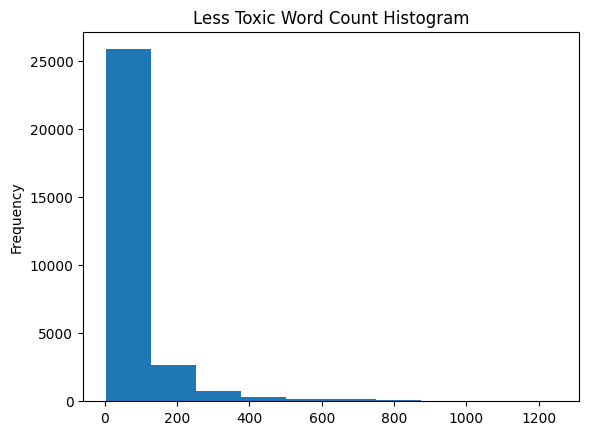

In [77]:
# prompt: using pandas to draw the histogram of "less_toxic_word_count"

x = monty.df_toxic_data['less_toxic_word_count'].plot.hist(bins=10,
  title='Less Toxic Word Count Histogram')


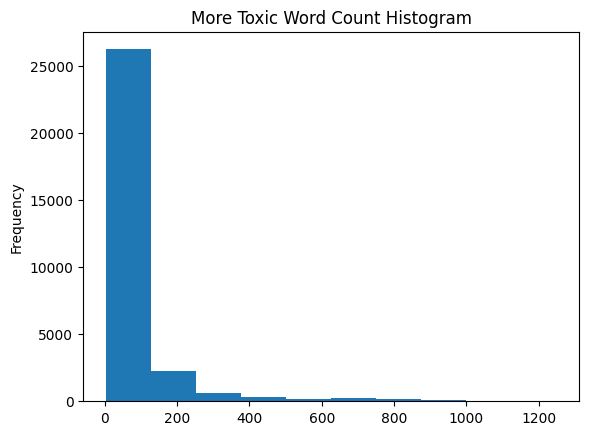

In [56]:
x = monty.df_toxic_data['more_toxic_word_count'].plot.hist(bins=10,
  title='More Toxic Word Count Histogram')

In [58]:
# prompt: print the max, min, mean, and std of column "les_toxic_word_count"

max_value = monty.df_toxic_data['less_toxic_word_count'].max()
min_value = monty.df_toxic_data['less_toxic_word_count'].min()
mean_value = monty.df_toxic_data['less_toxic_word_count'].mean()
std_value = monty.df_toxic_data['less_toxic_word_count'].std()

print(f"Max: {max_value}, Min: {min_value}, Mean: {mean_value}, Std: {std_value}")


Max: 1250, Min: 2, Mean: 72.52055931978212, Std: 112.6107522767769


In [59]:
# prompt: print the max, min, mean, and std of column "les_toxic_word_count"

max_value = monty.df_toxic_data['more_toxic_word_count'].max()
min_value = monty.df_toxic_data['more_toxic_word_count'].min()
mean_value = monty.df_toxic_data['more_toxic_word_count'].mean()
std_value = monty.df_toxic_data['more_toxic_word_count'].std()

print(f"Max: {max_value}, Min: {min_value}, Mean: {mean_value}, Std: {std_value}")

Max: 1250, Min: 2, Mean: 70.35349408795004, Std: 125.1352287775021


In [61]:
!pip install wordcloud
import wordcloud
# help(wordcloud.WordCloud)

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/03/c9/eedf685caa682eefb71c9e827def4604d699da7c3cbf50aa3f577553c33e/wordcloud-1.9.3-cp310-cp310-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.6/172.6 kB 2.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [78]:
# prompt: write a Python function with documentation for drawing a word cloud plot for a dataframe 'less_toxic_word_count'.
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wordcloud(df, column, title="Word Cloud"):
    """
    Generate a word cloud from text data in a specified DataFrame column.

    Args:
    df (pd.DataFrame): The DataFrame containing the text data.
    column (str): The name of the column containing the text data.

    Returns:
    None
    """
    # Ensure the column exists in the DataFrame
    if column not in df.columns:
        print(f"The column {column} does not exist in the DataFrame.")
        return

    # Combine all the text from the column into a single string
    text = ' '.join(df[column].astype(str).values)

    # create special word stops
    my_stop_words = {'page', 'will', 'one', 'edit', 'article', 'know', 'way', 'say'}
    combined_set = STOPWORDS.union(my_stop_words)

    # Create a WordCloud object and generate the wordcloud
    wordcloud = WordCloud(background_color='white', width=800, height=800,
      max_words=300, stopwords=combined_set).generate(text)

    # Display the generated wordcloud
    plt.figure(figsize=(8,8),facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.show()

    # Save the wordcloud to a file
    wordcloud.to_file('wordcloud.png')
    return

# Example usage:-
# generate_wordcloud(result_df, 'Article_Text')

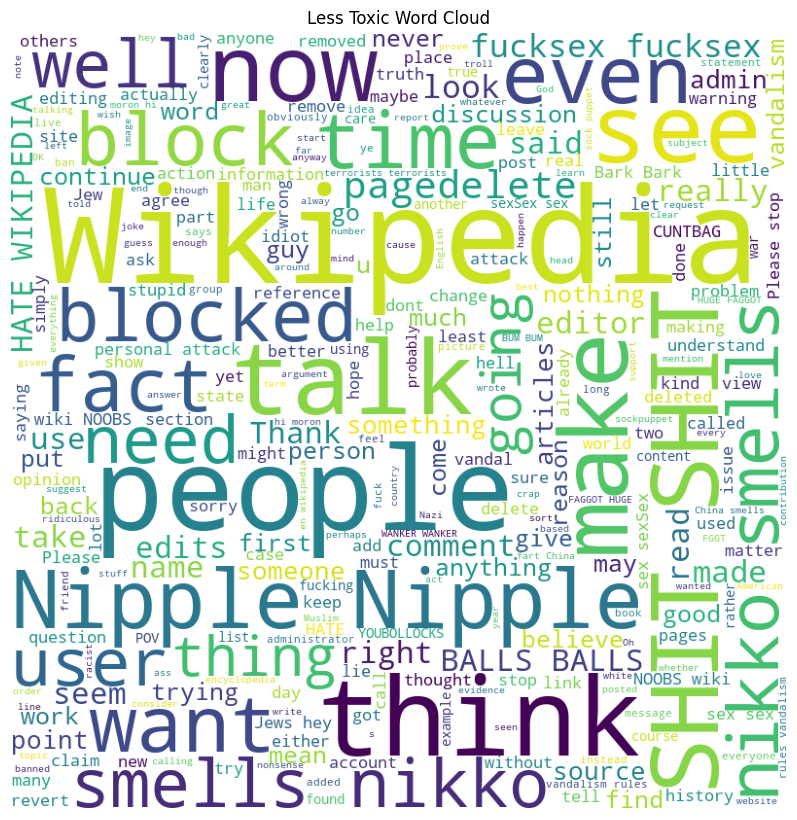

In [73]:
generate_wordcloud(monty.df_toxic_data, "less_toxic", "Less Toxic Word Cloud")

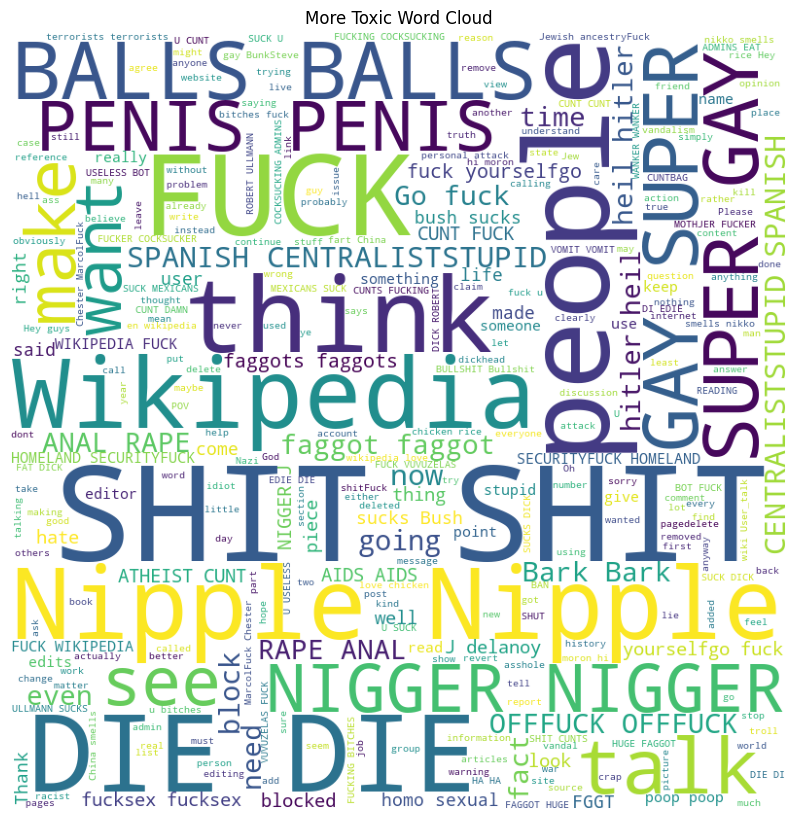

In [79]:
generate_wordcloud(monty.df_toxic_data, "more_toxic", "More Toxic Word Cloud")

In [65]:
wordcloud.STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [66]:
my_stop_words = {'page', 'will', 'one', 'edit', 'article', 'know', 'way', 'say'}

In [68]:
# prompt: combine two sets, wordcloud.STOPWORDS and my_stop_words

combined_set = wordcloud.STOPWORDS.union(my_stop_words)

In [69]:
combined_set

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'article',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'edit',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 'know',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'one',
 'only',
 'or',
 'oth

In [ ]:
# redraw them by re-run previous generate_wordcloud cell/command.

# 🤖 Update engine

---

- Write a few functions to make the API and hook into Gradio and Huggingface.

In [ ]:
# %%writefile -a app.py
#
# # for openai version 1.3.8
@add_method(Pluto_Happy)
#
def _fetch_moderate_engine(self):
  self.ai_client = openai.OpenAI(api_key=self._openai_key)
  self.text_model = "text-moderation-latest"
  return
#
@add_method(Pluto_Happy)
# f
def _censor_me(self, p, safer=0.0005):
  self._fetch_moderate_engine()
  resp_orig = self.ai_client.moderations.create(input=p, model=self.text_model)
  resp_dict = resp_orig.model_dump()
  #
  v1 = resp_dict["results"][0]["category_scores"]
  max_key = max(v1, key=v1.get)
  max_value = v1[max_key]
  sum_value = sum(v1.values())
  #
  v1["is_safer_flagged"] = False
  if (max_value >= safer):
    v1["is_safer_flagged"] = True
  v1["is_flagged"] = resp_dict["results"][0]["flagged"]
  v1['max_key'] = max_key
  v1['max_value'] = max_value
  v1['sum_value'] = sum_value
  v1['safer_value'] = safer
  v1['message'] = p
  return v1
#
@add_method(Pluto_Happy)
def _draw_censor(self,data):
  self._color_mid_gray = '#6c757d'
  exp = (0.01, 0.01)
  x = [data['max_value'], (1-data['max_value'])]
  title=f"\nUnsafe: {data['max_key']}: {(data['max_value']*100):.2f}% Confidence\n"
  lab = [data['max_key'], 'Other 13 categories']
  if (data['is_flagged']):
    col=[self.color_danger, self.color_mid_gray]
  elif (data['is_safer_flagged']):
    col=[self.color_warning, self.color_mid_gray]
    lab = ['Relative Score:\n'+data['max_key'], 'Other 13 categories']
    title=f"\nPersonal Unsafe: {data['max_key']}: {(data['max_value']*100):.2f}% Confidence\n"
  else:
    col=[self.color_mid_gray, self.color_success]
    lab = ['False Negative:\n'+data['max_key'], 'Other 13 categories']
    title='\nSafe Message\n'
  canvas = self._draw_donut(x, lab, col, exp,title)
  return canvas
#
@add_method(Pluto_Happy)
def _draw_donut(self,data,labels,col, exp,title):
  # col = [self.color_danger, self._color_secondary]
  # exp = (0.01, 0.01)
  # Create a pie chart
  canvas, pic = matplotlib.pyplot.subplots()
  pic.pie(data, explode=exp,
    labels=labels,
    colors=col,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'#0a0a0a'})
  # Draw a circle at the center of pie to make it look like a donut
  # centre_circle = matplotlib.pyplot.Circle((0,0),0.45,fc='white')
  centre_circle = matplotlib.pyplot.Circle((0,0),0.45,fc=col[0],linewidth=2, ec='white')
  canvas = matplotlib.pyplot.gcf()
  canvas.gca().add_artist(centre_circle)

  # Equal aspect ratio ensures that pie is drawn as a circle.
  pic.axis('equal')
  pic.set_title(title)
  canvas.tight_layout()
  # canvas.show()
  return canvas
#
@add_method(Pluto_Happy)
# def censor_me(self, msg, safer=0.02, ibutton_1=0):
def fetch_toxicity_level(self, msg, safer):
  # safer=0.2
  yjson = self._censor_me(msg,safer)
  _canvas = self._draw_censor(yjson)
  _yjson = json.dumps(yjson, indent=4)
  # return (_canvas, _yjson)
  return(_canvas)

In [ ]:
# help(matplotlib.pyplot.Circle)

## 🦉 Smoke test

In [ ]:
# Smoke test
resp = monty._censor_me("I am but a sheep who is lost in the wood.")
resp

In [ ]:
# # prompt: print the first value of monty.df_toxic_data['more_toxic']

# monty.df_toxic_data['more_toxic'].values[0]


In [ ]:
# tesst with kaggle data
msg = str(monty.df_toxic_data['more_toxic'].sample(1).values[0])
resp = monty._censor_me(msg)
resp

# 🤗 Define HuggingFace Gradio Interface

---

- Build from scratch using Blocks() instead of the short cut using Interface()




In [ ]:
# %%write -a app.py
# result from a lot of prompt AI and old fashion try and error

# print(gradio.__version__)
import random

def say_hello(val):
  return f"Hello: {val}"
def say_toxic():
  return f"I am toxic"
def fetch_toxic_tweets(maxi=2):
    sample_df = monty.df_toxic_data.sample(maxi)
    is_true = random.choice([True, False])
    c1 = "more_toxic"
    if is_true:
      c1 = "less_toxic"
    toxic1 = sample_df[c1].iloc[0]
    # toxic1 = "cat eats my homework."
    return sample_df.to_html(index=False), toxic1
#
# define all gradio widget/components outside the block for easy to visualize the blocks structure
#
in1 = gradio.Textbox(lines=3, label="Enter Text:")
in2 = gradio.Slider(0.005, .1, value=0.02, step=.005,label="Personalize Safer Value: (larger value is less safe)")
out1 = gradio.Plot(label="Output:")
out2 = gradio.HTML(label="Real-world Toxic Posts/Tweets: *WARNING")
out3 = gradio.Textbox(lines=5, label="Output JSON:")
but1 = gradio.Button("Measure 14 Toxicity", variant="primary",size="sm")
but2 = gradio.Button("Fetch Toxic Text", variant="stop", size="sm")
#
txt1 = """
# 😃 Welcome To The Friendly Text Moderation

### Identify 14 categories of text toxicity.

> This NLP (Natural Language Processing) AI demonstration aims to prevent profanity, vulgarity, hate speech, violence, sexism, and other offensive language.
>It is **not an act of censorship**, as the final UI (User Interface) will give the reader, but not a young reader, the option to click on a label to read the toxic message.
>The goal is to create a safer and more respectful environment for you, your colleages, and your family.
> This NLP app is 1 of 3 hands-on courses, ["AI Solution Architect," from ELVTR and Duc Haba](https://elvtr.com/course/ai-solution-architect?utm_source=instructor&utm_campaign=AISA&utm_content=linkedin).
---
### 🌴 Helpful Instruction:

1. Enter your [harmful] message in the input box.

2. Click the "Measure 14 Toxicity" button.
3. View the result on the Donut plot.
4. (**Optional**) Click on the "Fetch Real World Toxic Dataset" below.
5. There are additional options and notes below.
"""
txt2 = """
## 🌻 Author and Developer Notes:
---
- The demo uses the cutting-edge (2024) AI Natural Language Processing (NLP) model from OpenAI.
- This NLP app is 1 of 3 hands-on apps from the ["AI Solution Architect," from ELVTR and Duc Haba](https://elvtr.com/course/ai-solution-architect?utm_source=instructor&utm_campaign=AISA&utm_content=linkedin).

- It is not a Generative (GenAI) model, such as Google Gemini or GPT-4.
- The NLP understands the message context, nuance, innuendo, and not just swear words.
- We **challenge you** to trick it, i.e., write a toxic tweet or post, but our AI thinks it is safe. If you win, please send us your message.
- The 14 toxicity categories are as follows:

    1. harassment
    2. harassment threatening
    3. harassment instructions
    4. hate
    5. hate threatening
    6. hate instructions
    7. self harm
    8. self harm instructions
    9. self harm intent
    10. self harm minor
    11. sexual
    12. sexual minors
    13. violence
    14. violence graphic

- If the NLP model classifies the message as "safe," you can still limit the level of toxicity by using the "Personal Safe" slider.
- The smaller the personal-safe value, the stricter the limitation. It means that if you're a young or sensitive adult, you should choose a lower personal-safe value, less than 0.02, to ensure you're not exposed to harmful content.
- The color of the donut plot is as follows:
  - Red is an "unsafe" message by the NLP model
  - Green is a "safe" message
  - Yellow is an "unsafe" message by your toxicity level

- The **"confidence"** score refers to the confidence level in detecting a particular type of toxicity among the 14 tracked types. For instance, if the confidence score is 90%, it indicates a 90% chance that the toxicity detected is of that particular type. In comparison, the remaining 13 toxicities collectively have a 10% chance of being the detected toxicity. Conversely, if the confidence score is 3%, it could indicate any toxicity. It's worth noting that the Red, Green, or Yellow safety levels do not influence the confidence score.

- The real-world dataset is from the Jigsaw Rate Severity of Toxic Comments on Kaggle. It has 30,108 records.
    - Citation:
    - Ian Kivlichan, Jeffrey Sorensen, Lucas Dixon, Lucy Vasserman, Meghan Graham, Tin Acosta, Walter Reade. (2021). Jigsaw Rate Severity of Toxic Comments . Kaggle. https://kaggle.com/competitions/jigsaw-toxic-severity-rating
- The intent is to share with Duc's friends and colleagues, but for those with nefarious intent, this Text Moderation model is governed by the GNU 3.0 License: https://www.gnu.org/licenses/gpl-3.0.en.html
- Author: Copyright (C), 2024 **[Duc Haba](https://linkedin.com/in/duchaba)**
---
# 🌟 "AI Solution Architect" Course by ELVTR

>Welcome to the fascinating world of AI and natural language processing (NLP). This NLP model is a part of one of three hands-on application. In our journey together, we will explore the [AI Solution Architect](https://elvtr.com/course/ai-solution-architect?utm_source=instructor&utm_campaign=AISA&utm_content=linkedin) course, meticulously crafted by ELVTR in collaboration with Duc Haba. This course is intended to serve as your gateway into the dynamic and constantly evolving field of AI Solution Architect, providing you with a comprehensive understanding of its complexities and applications.

>An AI Solution Architect (AISA) is a mastermind who possesses a deep understanding of the complex technicalities of AI and knows how to creatively integrate them into real-world solutions. They bridge the gap between theoretical AI models and practical, effective applications. AISA works as a strategist to design AI systems that align with business objectives and technical requirements. They delve into algorithms, data structures, and computational theories to translate them into tangible, impactful AI solutions that have the potential to revolutionize industries.

> 🍎 [Sign up for the course today](https://elvtr.com/course/ai-solution-architect?utm_source=instructor&utm_campaign=AISA&utm_content=linkedin), and I will see you in class.

- An article about this NLP Text Moderation will be coming soon.
"""
txt3 = """
## 💥 WARNING: WARNING:
---

- The following button will retrieve **real-world** offensive posts from Twitter and customer reviews from consumer companies.
- The button will display four toxic messages at a time. **Click again** for four more randomly selected postings/tweets.
- They contain **profanity, vulgarity, hate, violence, sexism, and other offensive language.**
- After you fetch the toxic messages, Click on the **"Measure 14 Toxicity" button**.
"""
#reverse_button.click(process_text, inputs=text_input, outputs=reversed_text)
#

with gradio.Blocks() as gradio_app:
  # title
  gradio.Markdown(txt1) # any html or simple mark up
  #
  # first row, has two columns 1/3 size and 2/3 size
  with gradio.Row():    # items inside rows are columns
    # left column
    with gradio.Column(scale=1): # items under columns are row, scale is 1/3 size
      # left column has two rows, text entry, and buttons
      in1.render()
      in2.render()
      but1.render()
      but1.click(monty.fetch_toxicity_level, inputs=[in1, in2], outputs=out1)

    with gradio.Column(scale=2):
      out1.render()
  #
  # second row is warning text
  with gradio.Row():
    gradio.Markdown(txt3)

  # third row is fetching toxic data
  with gradio.Row():
    with gradio.Column(scale=1):
      but2.render()
      but2.click(fetch_toxic_tweets, inputs=None, outputs=[out2, in1])
    with gradio.Column(scale=2):
      out2.render()

  # fourth row is note text
  with gradio.Row():
    gradio.Markdown(txt2)

In [ ]:
# gradio_app.close()

## 🍒 QA - Test it locally on Jupyter Notebook
---

- It will failed to test locally if you running VPN

In [ ]:
# %%write -a app.py
# open/launch it
gradio_app.launch()

In [ ]:
@add_method(Pluto_Happy)
def fetch_code_cells(self, notebook_name,
  filter_magic="# %%write",
  write_to_file=True, fname_override=None):

  """
  Reads a Jupyter notebook (.ipynb file) and writes out all the code cells
  that start with the specified magic command to a .py file.

  Parameters:
  - notebook_name (str): Name of the notebook file (with .ipynb extension).
  - filter_magic (str): Magic command filter. Only cells starting with this command will be written.
      The defualt is: "# %%write"
  - write_to_file (bool): If True, writes the filtered cells to a .py file.
      Otherwise, prints them to the standard output. The default is True.
  - fname_override (str): If provided, overrides the output filename. The default is None.

  Returns:
  - None: Writes the filtered code cells to a .py file or prints them based on the parameters.

  """
  with open(notebook_name, 'r', encoding='utf-8') as f:
    notebook_content = json.load(f)

  output_content = []

  # Loop through all the cells in the notebook
  for cell in notebook_content['cells']:
    # Check if the cell type is 'code' and starts with the specified magic command
    if cell['cell_type'] == 'code' and cell['source'] and cell['source'][0].startswith(filter_magic):
      # Append the source code of the cell to output_content
      output_content.append(''.join(cell['source']))

  if write_to_file:
    if fname_override is None:
      # Derive the output filename by replacing .ipynb with .py
      output_filename = notebook_name.replace(".ipynb", ".py")
    else:
      output_filename = fname_override
    with open(output_filename, 'w', encoding='utf-8') as f:
      f.write('\n'.join(output_content))
    print(f'File: {output_filename} written to disk.')
  else:
    # Print the code cells to the standard output
    print('\n'.join(output_content))
    print('-' * 40)  # print separator
  return
# Example usage:
# print_code_cells_from_notebook('your_notebook_name_here.ipynb')

# 🥳 + 🎉: DONE: AI Solution Architect Job Is Done
---

- As an AI solution architect, your job is technially done.

- The rest of the steps are for Deployment Engineer or Backend Solution Architect

## Write/create required files

In [ ]:
# define the huggingface name
monty.hface_space = 'duchaba/Friendly_Text_Moderation'

In [ ]:
# openai: 0.27.7,              Actual: 0.27.7
# huggingface_hub: 0.14.1,     Actual: 0.15.1
# gradio: 3.32.0,              Actual: 3.32.0
# cryptography: 40.0.2,        Actual: 40.0.2

In [ ]:
!cat "/content/pluto_happy/requirements.txt"

In [ ]:
# create the requirements.txt file
txt = ["openai", "gradio","cryptography", "huggingface_hub", "psutil", "pynvml", "py-cpuinfo", "flopth"]
monty.write_file("requirements.txt", txt)

In [ ]:
# optional double check it
!cat requirements.txt

**STOP**

1. Download this notebook

1. Upload it

In [ ]:
!pwd

In [ ]:
fname = "/content/text_moderation/Text_Moderation.ipynb"
monty.fetch_code_cells(fname, fname_override="app_part2.py")

In [ ]:
# prompt: use unix command to concat file1 and file2

!cat /content/pluto_happy/pluto.py app_part2.py > app.py


In [ ]:
# uncomment the %%write code cell about to create app.py
# then double check it
!cat app.py

## Create the HuggingFace page

- Choose a unique file-space, like happy_butterfly

- First option, do it on huggingface.com website (recomented)

- Second option, do it programatically (optional, uncomment below)

In [ ]:
# # second option
# api = huggingface_hub.HfApi()
# api.create_repo(repo_id=pluto.hface_name, private=False)

# 🐣 Deploy to HuggingFace Sandbox

---

- Read the tutorial above if you are confused.

- It is easy. "app.py" and "requirements.txt" are the two files that you need to upload.
  - Link to create the app.py file on huggingface web: https://huggingface.co/spaces/duchaba/new/main?filename=app.py

- Optional are depending on your more fancy layout/output

## Push to files to Hugging face

In [ ]:
@add_method(Pluto_Happy)
def _login_hface(self):
  huggingface_hub.login(self.decrypt_it(self._huggingface_key),
    add_to_git_credential=True) # non-blocking login
  self._ph()
  return

In [ ]:
monty._login_hface()

In [ ]:
up_files = ["app.py", "requirements.txt", "toxic_data.csv"]
monty.push_hface_files(up_files, hf_space=monty.hface_space)

In [ ]:
# test it
print(f'https://huggingface.co/spaces/{monty.hface_space}')

# 🐢 Pull and Push to Github (Optional)

---

**Note:** ✋

- QA it on this notebook **BEFORE** push it.

- If you change any data or files, commit and push it to github. For now, we don't need pull-request, so push it to main or your-branch-name.

- I ussualy comment out the section because I don't want to accidental run it (when not ready).

In [ ]:
!pwd

In [ ]:
import os
f = '/content'
# f = '/content/foxy_cnn_image_classification'
os.chdir(f)

In [ ]:
!git branch

In [ ]:
!git pull

In [ ]:
# check for update file
!git diff --name-only

In [ ]:
# import os
# f = 'Data-Augmentation-with-Python'
# os.chdir(f)
!git add -A
!git config --global user.email "duc.haba@gmail.com"
!git config --global user.name "duchaba"
!git commit -m "add new predict methods"
# # do the git push in the xterm console
# #!git push

In [ ]:
# # check for any in stage ready to commit
# !git diff --name-only --staged

In [ ]:
# check what were the commits
!git log --name-status HEAD^..HEAD

In [ ]:
# double check it before commit
!git status

In [ ]:
!pip install lfs

In [ ]:
# prompt: git push large file

!git-lfs track *.pkl

In [ ]:
# push it
fname = "https://duchaba:@github.com/duchaba/pluto_happy.git"
!git push {fname}

In [ ]:
# !curl https://api.openai.com/v1/moderations \
#   -H "Content-Type: application/json" \
#   -H "Authorization: Bearer $OPENAI_API_KEY" \
#   -d '{"input": "I want to kill them all."}'

# 🕺 That's it. It's dancing time.

---

In [ ]:
print('the end.')

# 🍵 Conclusion

- That is it for the NLP text moderation from soup to nuts.

- Use this LLM "as-is" or as a template to create your own model.

In [ ]:
# monty.print_dancing()